In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm_notebook as tq
import matplotlib.gridspec as gridspec
import pickle
from itertools import product
import traceback
from multiprocessing import Pool
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
print(sys.path)
sys.path.append('/data5/bio/runs-tikhonova/anaconda3/lib/site-packages')

['/data5/bio/runs-tikhonova/TADs', '/data5/bio/runs-tikhonova/anaconda3/envs/main/lib/python37.zip', '/data5/bio/runs-tikhonova/anaconda3/envs/main/lib/python3.7', '/data5/bio/runs-tikhonova/anaconda3/envs/main/lib/python3.7/lib-dynload', '', '/data5/bio/runs-tikhonova/anaconda3/envs/main/lib/python3.7/site-packages', '/data5/bio/runs-tikhonova/anaconda3/envs/main/lib/python3.7/site-packages/IPython/extensions', '/home/tikhonova/.ipython']


In [2]:
import pybedtools
from matplotlib_venn import venn3
from ipywidgets import interact, interactive, fixed, interact_manual
# from ipywidgets import StaticInteract, , RangeWidget, RadioWidget
import ipywidgets as widgets

In [3]:
# home_path = '/mnt/c/Users/tikho/Documents/WORK/TADs/'
home_path = ''

### HGMGN3

In [10]:
with open(home_path+'HMGN3 data/bedfiles_colnames.txt') as f:
    columns = f.readlines()
columns = [col.split('-')[0].strip() for col in columns]
protein = pd.read_csv(home_path+'HMGN3 data/ENCFF002CWT_thresholded.bed', sep='\t', names=columns)
chrm_dict = {str(i):i for i in range(1, 23)}
chrm_dict['X'] = 23
chrm_dict['Y'] = 24
protein['chromnum'] = [chrm_dict[chrm.replace('chr', '')] for chrm in protein.chrom.values]
protein.sort_values(by=['chromnum', 'chromStart'], inplace=True)
protein.reset_index(drop=True, inplace=True)
protein['start'] = protein['chromStart'].values - 200
protein['end'] = protein['chromEnd'].values + 200
protein['feature'] = ['protein%d'%i for i in range(len(protein))]
print(protein.shape)
protein[['chrom', 'start', 'end', 'feature']].to_csv(home_path+'data/hmgn3.bed', sep='\t' , 
                                                     index=False, header=False)
protein.head()

(14587, 14)


,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue,peak,chromnum,start,end,feature
0,chr1,839127,839623,.,121,.,19.082629,-1,3.097951,248,1,838927,839823,protein0
1,chr1,839965,840461,.,244,.,38.232096,-1,4.224093,248,1,839765,840661,protein1
2,chr1,851757,852253,.,123,.,19.295648,-1,3.174243,248,1,851557,852453,protein2
3,chr1,856502,856710,.,448,.,70.162136,-1,4.224093,100,1,856302,856910,protein3
4,chr1,858975,859471,.,239,.,37.544466,-1,4.224093,248,1,858775,859671,protein4


In [144]:
with open(home_path+'HMGN3 data/bedfiles_colnames.txt') as f:
    columns = f.readlines()
columns = [col.split('-')[0].strip() for col in columns]
protein = pd.read_csv(home_path+'HMGN3 data/ENCFF002CWT_thresholded.bed', sep='\t', names=columns)
chrm_dict = {str(i):i for i in range(1, 23)}
chrm_dict['X'] = 23
chrm_dict['Y'] = 24
protein['chromnum'] = [chrm_dict[chrm.replace('chr', '')] for chrm in protein.chrom.values]
protein.sort_values(by=['chromnum', 'chromStart'], inplace=True)
protein.reset_index(drop=True, inplace=True)
protein['feature'] = ['protein%d'%i for i in range(len(protein))]

# for score in tq(np.unique(protein.score.values)):
#     for delta in tq(range(0, 301)):
        
def save_table(params):
        score, delta, protein = params
#         print(protein.head())
        protein['start'] = protein['chromStart'].values - delta
#         print(protein)
        protein['end'] = protein['chromEnd'].values + delta
        protein = protein.loc[protein.score.values >= score]
        # print(protein.shape)
        protein[['chrom', 'start', 'end', 'feature']].to_csv(home_path+'data/hmgn/hmgn3_%d_%d.bed'%(score, delta),
                                                             sep='\t' , 
                                                             index=False, header=False)
scores = [0]+np.unique(protein.score.values).tolist()
deltas = list(range(0, 301))
pool = Pool(processes=10)
res = pool.map(save_table, product(scores, deltas, [protein]))

#### Experiments

In [23]:
np.mean(protein['chromEnd'].values - protein['chromStart'].values)

486.67073421539726

(array([8.5000e+01, 5.4000e+01, 7.0000e+01, 6.3000e+01, 6.7000e+01,
        4.4000e+01, 2.6000e+01, 1.8000e+01, 1.9000e+01, 1.5000e+01,
        1.7000e+01, 7.0000e+00, 1.0000e+00, 4.0000e+00, 3.0000e+00,
        1.4088e+04, 3.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([124.  , 147.45, 170.9 , 194.35, 217.8 , 241.25, 264.7 , 288.15,
        311.6 , 335.05, 358.5 , 381.95, 405.4 , 428.85, 452.3 , 475.75,
        499.2 , 522.65, 546.1 , 569.55, 593.  ]),
 <a list of 20 Patch objects>)

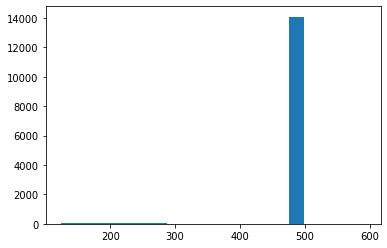

In [24]:
plt.hist(protein['chromEnd'].values - protein['chromStart'].values, bins=20)

19812258


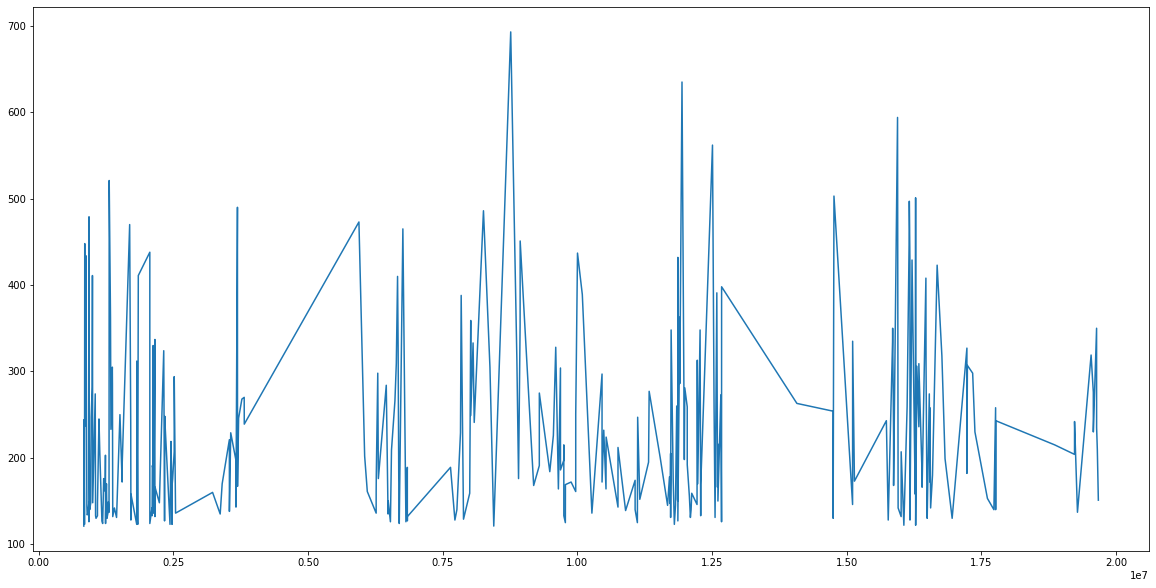

In [21]:
help_df = protein.copy()
help_df = help_df.loc[help_df.chrom.values == 'chr1']
plt.figure(figsize=(20, 10))
print(help_df['chromStart'].values[300])
plt.plot(help_df['chromStart'].values[:300], help_df.score.values[:300]);

(array([5.638e+03, 3.276e+03, 2.008e+03, 1.332e+03, 8.630e+02, 4.770e+02,
        2.940e+02, 2.110e+02, 1.210e+02, 8.300e+01, 5.900e+01, 4.500e+01,
        3.000e+01, 2.700e+01, 1.500e+01, 1.600e+01, 5.000e+00, 7.000e+00,
        6.000e+00, 7.400e+01]),
 array([ 121.  ,  164.95,  208.9 ,  252.85,  296.8 ,  340.75,  384.7 ,
         428.65,  472.6 ,  516.55,  560.5 ,  604.45,  648.4 ,  692.35,
         736.3 ,  780.25,  824.2 ,  868.15,  912.1 ,  956.05, 1000.  ]),
 <a list of 20 Patch objects>)

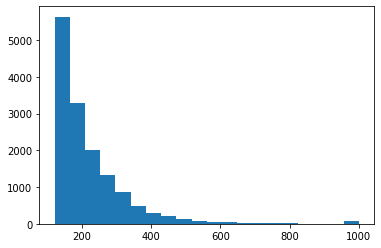

In [13]:
plt.hist(protein.score.values, bins=20)

(array([1.1471e+04, 2.3570e+03, 4.8500e+02, 1.3900e+02, 4.7000e+01,
        2.6000e+01, 1.3000e+01, 1.6000e+01, 1.1000e+01, 6.0000e+00,
        6.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 18.94097248,  42.10441053,  65.26784858,  88.43128663,
        111.59472468, 134.75816273, 157.92160079, 181.08503884,
        204.24847689, 227.41191494, 250.57535299, 273.73879104,
        296.90222909, 320.06566714, 343.22910519, 366.39254324,
        389.5559813 , 412.71941935, 435.8828574 , 459.04629545,
        482.2097335 ]),
 <a list of 20 Patch objects>)

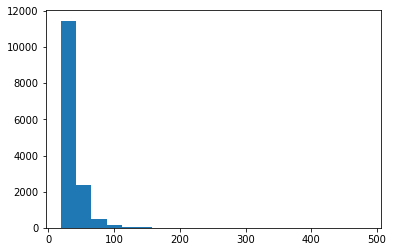

In [14]:
plt.hist(protein['signalValue'].values, bins=20)

### G4-seq

In [170]:
with open(home_path+'HMGN3 data/bedfiles_colnames.txt') as f:
    columns = f.readlines()
columns = [col.split('-')[0].strip() for col in columns]
g4seq = pd.read_csv(home_path+'G4-seq/Na_K_PDS_plus_hits_intersect.bed', sep='\t', names=columns)
g4seq = g4seq.loc[g4seq.chrom.values != 'chrM']
chrm_dict = {str(i):i for i in range(1, 23)}
chrm_dict['X'] = 23
chrm_dict['Y'] = 24
g4seq['chromnum'] = [chrm_dict[chrm.replace('chr', '')] for chrm in g4seq.chrom.values]
g4seq.sort_values(by=['chromnum', 'chromStart'], inplace=True)
g4seq.reset_index(drop=True, inplace=True)
g4seq['feature'] = ['g4seq%d'%i for i in range(len(g4seq))]
g4seq[['chrom', 'chromStart', 'chromEnd', 'feature']].to_csv(home_path+'data/g4seq.bed', sep='\t' , 
                                                             index=False, header=False)
print(g4seq.shape)
g4seq.head()

(206583, 12)


,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue,peak,chromnum,feature
0,chr1,9999,10524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,g4seq0
1,chr1,15058,15238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,g4seq1
2,chr1,21143,21593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,g4seq2
3,chr1,21634,21994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,g4seq3
4,chr1,26003,26209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,g4seq4


### G4-Chipseq

In [8]:
with open(home_path+'HMGN3 data/bedfiles_colnames.txt') as f:
    columns = f.readlines()
columns = [col.split('-')[0].strip() for col in columns]
g4chipseq = pd.read_csv(home_path+'G4-Chipseq/GSE107690_K562_High_confidence_peaks.bed', sep='\t', names=columns)
g4chipseq = g4chipseq.loc[g4chipseq.chrom.values != 'chrM']
chrm_dict = {str(i):i for i in range(1, 23)}
chrm_dict['X'] = 23
chrm_dict['Y'] = 24
g4chipseq['chromnum'] = [chrm_dict[chrm.replace('chr', '')] for chrm in g4chipseq.chrom.values]
g4chipseq.sort_values(by=['chromnum', 'chromStart'], inplace=True)
g4chipseq.reset_index(drop=True, inplace=True)
g4chipseq['feature'] = ['g4chipseq%d'%i for i in range(len(g4chipseq))]
g4chipseq[['chrom', 'chromStart', 'chromEnd', 'feature']].to_csv(home_path+'data/g4chipseq.bed', sep='\t' , 
                                                             index=False, header=False)
print(g4chipseq.shape)
g4chipseq.head()

(8940, 12)


,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue,peak,chromnum,feature
0,chr1,713977,714310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,g4chipseq0
1,chr1,762850,762982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,g4chipseq1
2,chr1,840076,840205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,g4chipseq2
3,chr1,894635,894796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,g4chipseq3
4,chr1,935414,935699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,g4chipseq4


### IMGQFinder

In [39]:
fold = 'imqfinder_results/imgq_g3/'
imgq = []
for file in os.listdir(fold):
    if file.endswith('_groups.csv'):
        data = pd.read_csv(fold+file, sep='\t')
        data['chrom'] = [file.replace('_groups.csv', '')]*len(data)
        data['chromStart'] = data['Q1-Start'].values
        data['chromEnd'] = data['Q4-Start'].values + data['Q4-Length'].values
        imgq.append(data[['chrom', 'chromStart', 'chromEnd']])
imgq = pd.concat(imgq)
        
imgq = pd.DataFrame(imgq)
chrm_dict = {str(i):i for i in range(1, 23)}
chrm_dict['X'] = 23
chrm_dict['Y'] = 24
imgq['chromnum'] = [chrm_dict[chrm.replace('chr', '')] for chrm in imgq.chrom.values]
imgq.sort_values(by=['chromnum', 'chromStart'], inplace=True)
imgq.reset_index(drop=True, inplace=True)
imgq['feature'] = ['imgq%d'%i for i in range(len(imgq))]
imgq[['chrom', 'chromStart', 'chromEnd', 'feature']].to_csv(home_path+'data/imgq3.bed', sep='\t' , 
                                                             index=False, header=False)
imgq.head()

,chrom,chromStart,chromEnd,chromnum,feature
0,chr1,11008,11026,1,imgq0
1,chr1,11053,11071,1,imgq1
2,chr1,12487,12513,1,imgq2
3,chr1,14664,14683,1,imgq3
4,chr1,15239,15259,1,imgq4


### Intersect

#### Bedtools modes

<img src='https://bedtools.readthedocs.io/en/latest/_images/intersect-glyph.png'></img>

### Code

#### Plots Codes

In [4]:
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse, Rectangle
from matplotlib.collections import PatchCollection

__all__ = ['circles', 'ellipses', 'rectangles']


def circles(x, y, s, c='b', vmin=None, vmax=None, **kwargs):
    """
    Make a scatter plot of circles. 
    Similar to plt.scatter, but the size of circles are in data scale.
    Parameters
    ----------
    x, y : scalar or array_like, shape (n, )
        Input data
    s : scalar or array_like, shape (n, ) 
        Radius of circles.
    c : color or sequence of color, optional, default : 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs.
        Note that `c` should not be a single numeric RGB or RGBA sequence 
        because that is indistinguishable from an array of values
        to be colormapped. (If you insist, use `color` instead.)  
        `c` can be a 2-D array in which the rows are RGB or RGBA, however. 
    vmin, vmax : scalar, optional, default: None
        `vmin` and `vmax` are used in conjunction with `norm` to normalize
        luminance data.  If either are `None`, the min and max of the
        color array is used.
    kwargs : `~matplotlib.collections.Collection` properties
        Eg. alpha, edgecolor(ec), facecolor(fc), linewidth(lw), linestyle(ls), 
        norm, cmap, transform, etc.
    Returns
    -------
    paths : `~matplotlib.collections.PathCollection`
    Examples
    --------
    a = np.arange(11)
    circles(a, a, s=a*0.2, c=a, alpha=0.5, ec='none')
    plt.colorbar()
    License
    --------
    This code is under [The BSD 3-Clause License]
    (http://opensource.org/licenses/BSD-3-Clause)
    """

    if np.isscalar(c):
        kwargs.setdefault('color', c)
        c = None

    if 'fc' in kwargs:
        kwargs.setdefault('facecolor', kwargs.pop('fc'))
    if 'ec' in kwargs:
        kwargs.setdefault('edgecolor', kwargs.pop('ec'))
    if 'ls' in kwargs:
        kwargs.setdefault('linestyle', kwargs.pop('ls'))
    if 'lw' in kwargs:
        kwargs.setdefault('linewidth', kwargs.pop('lw'))
    # You can set `facecolor` with an array for each patch,
    # while you can only set `facecolors` with a value for all.

    zipped = np.broadcast(x, y, s)
    patches = [Circle((x_, y_), s_)
               for x_, y_, s_ in zipped]
    collection = PatchCollection(patches, **kwargs)
    if c is not None:
        c = np.broadcast_to(c, zipped.shape).ravel()
        collection.set_array(c)
        collection.set_clim(vmin, vmax)

    ax = plt.gca()
    ax.add_collection(collection)
    ax.autoscale_view()
    plt.draw_if_interactive()
    if c is not None:
        plt.sci(collection)
    return collection

In [5]:
def form_plot_string( type_of_plot, *args, **kwargs):
        arguments = ','.join([str(i.tolist()) if str(type(i)).split('.')[0] == "<class 'numpy" 
                              else ('"'+str(i)+'"' if type(i) == str else str(i)) for i in args])
        properties = ','.join(['='.join([str(name), str(value.tolist())]) if str(type(value)).split('.')[0] == "<class 'numpy"
                               else ('='.join([str(name), '"'+str(value)+'"']) if type(value) == str 
                                     else '='.join([str(name), str(value)]))  for name, value in kwargs.items()])
        return (type_of_plot+'('+arguments+','+properties+')') if (len(arguments) != 0 and len(properties) != 0) else (type_of_plot+'('+arguments+properties+')')

In [114]:
def plot_intersect(table, colnames):
    k = len(table)
    radiuses_range = list(range(1, k*k+1))
    
#     minval = np.min(intersect_table.flatten()[intersect_table.flatten()!=0])
#     radiuses = intersect_table/minval
    
    radiuses = np.zeros((k, k))
    uniq = np.unique(table)
    radius_dict = {uni:rad for uni, rad in zip(uniq, radiuses_range)}
    for i, j in product(list(range(k)), list(range(k))):
        radiuses[i,j] = radius_dict[table[i,j]]
        
    plus = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            plus[i, j] = float('0.%s'%str(table[i, j])[:2])
    radiuses = radiuses+plus
#     print(radiuses)
    points = np.linspace(0, max(np.sum(radiuses, axis=1))*2+k-1, k)
#     print('points', max(np.sum(radiuses, axis=1))*2+3, points)
#     plt.figure(figsize=(8,8))
#     ax=plt.subplot(aspect='equal')
#     for i, x in enumerate(points):
#         for j, y in enumerate(points):
    all_points = list(product(points, points[::-1]))
#     print('rad_flat', list(radiuses.flatten()))
    colors = [1]*len(radiuses.flatten())
    for i in range(k):
            colors[k*i+i] = 5
#     print(colors)
    plot_data = []
    plot_data.append(form_plot_string('circles', np.array(all_points)[:, 0], np.array(all_points)[:, 1], 
                             radiuses.flatten(), alpha=0.5, c=colors))
    for (x, y), radius, text in zip(all_points, radiuses.flatten(), table.astype(int).flatten()):
#         print((x, y), radius, text)
        plot_data.append(form_plot_string('plt.text', x-(radius/2), y-0.25, text, fontsize=15))
    plot_data.append(form_plot_string('plt.xticks', points, colnames))
    plot_data.append(form_plot_string('plt.yticks', points[::-1], colnames))
    plot_data.append(form_plot_string('plt.title', 'Intersections table'))
#             ax.add_artist(circle)
#     plt.show()
    return plot_data

In [116]:
def plot_venn(ds_dict, intersect_table, colnames=['hmgn3', 'g4seq', 'g4chip', 'imgq'], mode='hmgn'):
    i_hmgn = np.where(np.array(colnames) == 'hmgn3')[0][0]
    i_seq = np.where(np.array(colnames) == 'g4seq')[0][0]
    i_chip = np.where(np.array(colnames) == 'g4chip')[0][0]
    i_imgq = np.where(np.array(colnames) == 'imgq')[0][0]

    g4seq_g4chip = ds_dict['g4seq_inter'].intersect(ds_dict['g4chip_inter'], u=True)
    g4seq_g4chip_imgq = g4seq_g4chip.intersect(ds_dict['imgq'], u=True)

    g4seq_len = int(intersect_table[i_hmgn, i_seq] - \
                intersect_table[i_seq, i_chip] - \
                intersect_table[i_seq, i_imgq] + len(g4seq_g4chip_imgq))
    g4chip_len = int(intersect_table[i_hmgn, i_chip] - \
                intersect_table[i_chip, i_seq] - \
                intersect_table[i_chip, i_imgq] + len(g4seq_g4chip_imgq))
    imgq_len = int(intersect_table[i_hmgn, i_imgq] - \
                intersect_table[i_imgq, i_chip] - \
                intersect_table[i_imgq, i_seq] + len(g4seq_g4chip_imgq))
    intersect_table = intersect_table.astype(int)
    v=form_plot_string('venn3', subsets = (g4seq_len, g4chip_len, 
                       intersect_table[i_seq, i_chip]-len(g4seq_g4chip_imgq), 
                       imgq_len,
                       intersect_table[i_imgq, i_chip]-len(g4seq_g4chip_imgq),intersect_table[i_seq, i_imgq]-len(g4seq_g4chip_imgq),
                       len(g4seq_g4chip_imgq)),
            set_labels = ('g4seq', 'g4chip', 'imgq'))
    return len(g4seq_g4chip_imgq), [v, form_plot_string('plt.title', 'HMGN3 Intersections')]

In [123]:
def plot_bar(intersect_table, trio, colnames=['hmgn3', 'g4seq', 'g4chip', 'imgq'], mode='original'):
#     plot_venn(ds_dict, intersect_table, colnames=['hmgn3', 'g4seq', 'g4chip', 'imgq']):
    i_hmgn = np.where(np.array(colnames) == 'hmgn3')[0][0]
    i_seq = np.where(np.array(colnames) == 'g4seq')[0][0]
    i_chip = np.where(np.array(colnames) == 'g4chip')[0][0]
    i_imgq = np.where(np.array(colnames) == 'imgq')[0][0]
    
    amount_hmgn = intersect_table[i_hmgn, i_hmgn]
    amounts = []
    for ind in [i_seq, i_chip, i_imgq]:
        amounts.append(intersect_table[i_hmgn, ind])
    for i in [i_seq, i_chip]:
        for j in [i_chip, i_imgq]:
            if i != j:
                amounts.append(intersect_table[i, j])
    amounts.append(trio)
    x = list(range(len(amounts)))
    plot_data = [] 
    if mode != 'percent':
        plot_data.append(form_plot_string('plt.bar', x, [amount_hmgn]*len(x), color='grey', alpha=0.5))
        plot_data.append(form_plot_string('plt.bar', x, amounts, color='teal', alpha=0.5))
    else:
        plot_data.append(form_plot_string('plt.bar', x, np.array(amounts)/amount_hmgn*100, color='teal', alpha=0.5))
        plot_data.append(form_plot_string('plt.ylim', 0, 100))
    plot_data.append(form_plot_string('plt.title', 'Fraction of protein intersections'))
    plot_data.append(form_plot_string('plt.xticks', [0, 1, 2, 3, 4, 5, 6], 
                 ["G4seq", "G4Chip", "Imgq", "G4seq-G4Chip", "G4seq-Imgq", "G4Chip-Imgq", "G4seq-G4Chip-Imgq"]))
    plot_data.append(form_plot_string('plt.xlabel', 'Intersections with HMGN3'))
    plot_data.append(form_plot_string('plt.ylabel', 'Number of HMGN3, Intersections'))
    return plot_data

#### Venn g4 prototype

In [174]:
small, middle, big = np.array(['g4seq', 'g4chip', 'imgq'])[np.argsort([len(g4seq), len(g4chip), len(imgq)])]
small, middle, big = [eval(sbs) for sbs in [small, middle, big]]
a = len(big) - len(big.intersect(middle, u=True))- len(big.intersect(small, u=True)) +\
               len(big.intersect(middle, u=True).intersect(small, u=True))
b = len(middle) - len(middle.intersect(big, u=True))- len(middle.intersect(small, u=True)) +\
               len(middle.intersect(big, u=True).intersect(small, u=True))
с = len(small) - len(small.intersect(big, u=True))- len(small.intersect(middle, u=True)) +\
               len(small.intersect(big, u=True).intersect(middle, u=True))
ab = len(middle.intersect(big, u=True)) - len(middle.intersect(big, u=True).intersect(small, u=True))
ac = len(small.intersect(big, u=True)) - len(small.intersect(big, u=True).intersect(small, u=True))
bc = len(middle.intersect(small, u=True)) - len(middle.intersect(big, u=True).intersect(small, u=True))
abc = len(big.intersect(middle, u=True).intersect(small, u=True))

In [175]:
seq_df = g4seq.to_dataframe()
print(min(-seq_df['start']+seq_df['end']), max(-seq_df['start']+seq_df['end']))#, -seq_df['start']+seq_df['end'])
seq_df = g4chip.to_dataframe()
print(min(-seq_df['start']+seq_df['end']), max(-seq_df['start']+seq_df['end']))#, -seq_df['start']+seq_df['end']
seq_df = imgq.to_dataframe()
print(min(-seq_df['start']+seq_df['end']), max(-seq_df['start']+seq_df['end']))#, -seq_df['start']+seq_df['end']

1 1781
1 1609
15 36


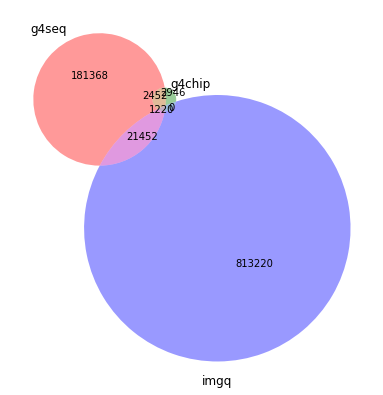

In [176]:
plt.figure(figsize=(10, 7), facecolor='white')
venn3(subsets = (b, с, bc, a, ab, ac, abc),
            set_labels = ('g4seq', 'g4chip', 'imgq'));

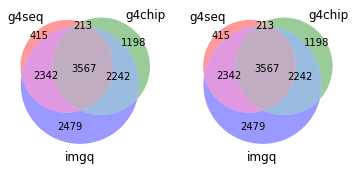

In [87]:
fig = plt.figure()
fig.add_subplot(121)
plot_venn(ds_dict, intersect_table)
fig.add_subplot(122)
plot_venn(ds_dict, intersect_table)

#### Tables Generating Codes

In [8]:
def generate_intersect_table(hmgn3, g4seq, g4chip, imgq, colnames, mode):
    '''
    mode: regions, hmgn, g4 
    '''
    mode_flag = False
    if mode != 'regions':
        mode_flag = True
    if mode != 'g4':
        g4chip_inter = hmgn3.intersect(g4chip, u=mode_flag)
        g4seq_inter = hmgn3.intersect(g4seq, u=mode_flag)
        imgq_inter = hmgn3.intersect(imgq, u=mode_flag)
    else:
        g4chip_inter = g4chip.intersect(hmgn3, u=mode_flag)
        g4seq_inter = g4seq.intersect(hmgn3, u=mode_flag)
        imgq_inter = imgq.intersect(hmgn3, u=mode_flag)
    ds_dict = {'hmgn3':hmgn3, 'g4chip_inter':g4chip_inter, 'g4seq_inter':g4seq_inter, 'imgq_inter':imgq_inter,
               'g4chip':g4chip, 'g4seq':g4seq, 'imgq':imgq}    
    
    intersect_table = np.zeros((len(colnames), len(colnames)))
    for i, ds1 in enumerate(colnames):
        for j, ds2 in enumerate(colnames):
    #         print(ds1, ds2)
            A = ds1 if mode != 'g4' else ds2
            B = ds2 if mode != 'g4' else ds1
            if i != j:
                if (ds1 != 'hmgn3') and (ds2 != 'hmgn3'):
                    intersect_table[i, j] = len(ds_dict[A+'_inter'].intersect(ds_dict[B], u=mode_flag))
#                     print(A, B)
#                 elif (ds1 == 'hmgn3'):
                else:
                    intersect_table[i, j] = len(ds_dict[A].intersect(ds_dict[B], u=mode_flag))
#                     print(A, B)
#                 else:
#                     intersect_table[i, j] = len(ds_dict[B].intersect(ds_dict[A], u=mode_flag))
#                     print(A, B)
            else:
                intersect_table[i, j] = len(ds_dict[A].intersect(ds_dict[B], u=mode_flag))
#                 print(A, B)
    return ds_dict, intersect_table

#### Drafts (Generating all HMGN3 tables)

#### Precompute intersections Codes

In [11]:
with open(home_path+'data/bedfiles_colnames.txt') as f:
    columns = f.readlines()
columns = [col.split('-')[0].strip() for col in columns]
protein = pd.read_csv(home_path+'data/ENCFF002CWT_thresholded.bed', sep='\t', names=columns)
chrm_dict = {str(i):i for i in range(1, 23)}
chrm_dict['X'] = 23
chrm_dict['Y'] = 24
protein['chromnum'] = [chrm_dict[chrm.replace('chr', '')] for chrm in protein.chrom.values]
protein.sort_values(by=['chromnum', 'chromStart'], inplace=True)
protein.reset_index(drop=True, inplace=True)
protein['feature'] = ['protein%d'%i for i in range(len(protein))]


def compute_intersections(params):
    colnames = ['hmgn3', 'g4seq', 'g4chip', 'imgq']
    global protein
    score, delta = params
    if not os.path.exists('data/intersections/%d_%d.pickle'%(score, delta)):
        try:            
            protein['start'] = protein['chromStart'].values - delta
    #         print(protein)
            protein['end'] = protein['chromEnd'].values + delta
            hmgn3 = pybedtools.BedTool.from_dataframe(protein.loc[protein.score.values >= score, ['chrom', 'start', 'end', 'feature']])
            g4seq = pybedtools.BedTool(home_path+'data/g4seq.bed')
            g4chip = pybedtools.BedTool(home_path+'data/g4chipseq.bed')
            imgq = pybedtools.BedTool(home_path+'data/imgq3.bed')

            ds_dict, intersect_table = generate_intersect_table(hmgn3, g4seq, g4chip, imgq, colnames, mode='regions')
            ds_dict_hmgn, intersect_table_hmgn = generate_intersect_table(hmgn3, g4seq, g4chip, imgq, colnames, mode='hmgn')
            ds_dict_g4, intersect_table_g4 = generate_intersect_table(hmgn3, g4seq, g4chip, imgq, colnames, mode='g4')

            with open('data/intersections/%d_%d.pickle'%(score, delta), 'wb') as f:
                pickle.dump([ds_dict, intersect_table, ds_dict_hmgn, intersect_table_hmgn, ds_dict_g4, intersect_table_g4], f)
        except Exception as e:
            with open('log.file', 'a') as f:
                f.write('data/intersections/%d_%d.pickle'%(score, delta))
                f.write(e.message)
                f.write(e.args)
                f.write(''.join(traceback.format_stack()))

##### Check

In [48]:
# Check
compute_intersections((0, 0))

#### Interactive plots Codes

In [13]:
def generate_plots(hmgn3, g4seq, g4chip, imgq, colnames = ['hmgn3', 'g4seq', 'g4chip', 'imgq']):
    ds_dict, intersect_table = generate_intersect_table(hmgn3, g4seq, g4chip, imgq, colnames, mode='regions')
    ds_dict_hmgn, intersect_table_hmgn = generate_intersect_table(hmgn3, g4seq, g4chip, imgq, colnames, mode='hmgn')
    ds_dict_g4, intersect_table_g4 = generate_intersect_table(hmgn3, g4seq, g4chip, imgq, colnames, mode='g4')
    
    fig = plt.figure(constrained_layout=True, figsize=(15, 15), facecolor='white')
    gs = fig.add_gridspec(3, 2)
    f3_ax1 = fig.add_subplot(gs[:2, 0], aspect='equal')
    plot_intersect(intersect_table_g4, colnames)
    
    f3_ax2 = fig.add_subplot(gs[0, 1])
    trio_hmgn = plot_venn(ds_dict_hmgn, intersect_table_hmgn, colnames)
    
    f3_ax3 = fig.add_subplot(gs[1, 1])
    trio_g4 = plot_venn(ds_dict_g4, intersect_table_g4, colnames)
    
    f3_ax3 = fig.add_subplot(gs[2, :])
    plot_bar(intersect_table_hmgn, trio_hmgn)
    return fig

In [109]:
def pregenerate_plots(data):
    if len(data) == 3:
        score, delta, obliged = data
        data = data[:-1]
    else:
        score, delta = data
        obliged = False
    if not os.path.exists('data/intersections plots/%d_%d.pickle'%(score, delta)) or obliged:
        try:
            with open('data/intersections/%d_%d.pickle'%(score, delta), 'rb') as f:
                 ds_dict, intersect_table, ds_dict_hmgn, intersect_table_hmgn, ds_dict_g4, intersect_table_g4 = pickle.load(f)
        except:
            try:
#                 try:
#                     os.remove('data/intersections plots/%d_%d.pickle'%(score, delta))
#                 except:
#                     pass
                try:
                    os.remove('data/intersections/%d_%d.pickle'%(score, delta))
                except:
                    pass
                compute_intersections(data)
                with open('data/intersections/%d_%d.pickle'%(score, delta), 'rb') as f:
                     ds_dict, intersect_table, ds_dict_hmgn, intersect_table_hmgn, ds_dict_g4, intersect_table_g4 = pickle.load(f)
            except Exception as e:
                    with open('log.file', 'a') as f:
                        f.write('data/intersections/%d_%d.pickle\n'%(score, delta))
    #                     f.write(e.message)
                        try:
                            f.write(''.join(e.args))
                        except:
                            pass
                        f.write(''.join(traceback.format_stack()))
                        f.write('\n')
                        
                        return
    
        try:
            colnames = ['hmgn3', 'g4seq', 'g4chip', 'imgq']
    #         fig = plt.figure(constrained_layout=True, figsize=(15, 15), facecolor='white')
    #         gs = fig.add_gridspec(3, 2)

    #         f3_ax1 = fig.add_subplot(gs[:2, 0], aspect='equal')
            plot1 = plot_intersect(intersect_table_g4, colnames)

    #         f3_ax2 = fig.add_subplot(gs[0, 1])
            trio_hmgn, plot2 = plot_venn(ds_dict_hmgn, intersect_table_hmgn, colnames)

    #         f3_ax3 = fig.add_subplot(gs[1, 1])
            trio_g4, plot3 = plot_venn(ds_dict_g4, intersect_table_g4, colnames)

    #         f3_ax3 = fig.add_subplot(gs[2, :])
            plot4 = plot_bar(intersect_table_hmgn, trio_hmgn)
            with open('data/intersections plots/%d_%d.pickle'%(score, delta), 'wb') as f:
                    pickle.dump([[str(plot_i) for plot_i in plot1], 
                                 [str(plot_i) for plot_i in plot2], 
                                 [str(plot_i) for plot_i in plot3], 
                                 [str(plot_i) for plot_i in plot4]], f)      
        except:
#             try:
#                 os.remove('data/intersections plots/%d_%d.pickle'%(score, delta))
#             except:
#                 pass
            try:
                os.remove('data/intersections/%d_%d.pickle'%(score, delta))
            except:
                pass
            pregenerate_plots(data)
#     else:
#         try:
#              with open('data/intersections plots/%d_%d.pickle'%(score, delta), 'rb') as f:
#                     pickle.load(f)
#         except:
# #             try:
# #                 os.remove('data/intersections plots/%d_%d.pickle'%(score, delta))
# #             except:
# #                 pass
# #             try:
#                 os.remove('data//intersections/%d_%d.pickle'%(score, delta))
#             except:
#                 pass
#             pregenerate_plots(data)

In [112]:
def pregenerate_plots_clean(data):
    if len(data) == 3:
        score, delta, obliged = data
        data = data[:-1]
    else:
        score, delta = data
        obliged = False
    
    print('computing')
    compute_intersections(data)
    with open('data/intersections/%d_%d.pickle'%(score, delta), 'rb') as f:
         ds_dict, intersect_table, ds_dict_hmgn, intersect_table_hmgn, ds_dict_g4, intersect_table_g4 = pickle.load(f)
    print('Plotting')
    colnames = ['hmgn3', 'g4seq', 'g4chip', 'imgq']
    #         fig = plt.figure(constrained_layout=True, figsize=(15, 15), facecolor='white')
    #         gs = fig.add_gridspec(3, 2)

    #         f3_ax1 = fig.add_subplot(gs[:2, 0], aspect='equal')
    plot1 = plot_intersect(intersect_table_g4, colnames)

#         f3_ax2 = fig.add_subplot(gs[0, 1])
    trio_hmgn, plot2 = plot_venn(ds_dict_hmgn, intersect_table_hmgn, colnames)

#         f3_ax3 = fig.add_subplot(gs[1, 1])
    trio_g4, plot3 = plot_venn(ds_dict_g4, intersect_table_g4, colnames)

#         f3_ax3 = fig.add_subplot(gs[2, :])
    plot4 = plot_bar(intersect_table_hmgn, trio_hmgn)
    with open('data/intersections plots/%d_%d.pickle'%(score, delta), 'wb') as f:
            pickle.dump([[str(plot_i) for plot_i in plot1], 
                         [str(plot_i) for plot_i in plot2], 
                         [str(plot_i) for plot_i in plot3], 
                         [str(plot_i) for plot_i in plot4]], f) 

In [151]:
def generate_plots_interactive(score, delta):
    global main_data
#     with open('data/intersections plots/%d_%d.pickle'%(score, delta), 'rb') as f:
#          plot1, plot2, plot3, plot4 = pickle.load(f)
#     print('data', main_data)
#     print(score, delta, main_data[(score, delta)])
    plot1, plot2, plot3, plot4 = main_data[(score, delta)]
    fig = plt.figure(constrained_layout=False, figsize=(13, 10), facecolor='white')
#     plt.subplots_adjust(hspace=0.05, top=.99)
    plt.subplots_adjust(hspace=0.01, top=.99)
    gs = fig.add_gridspec(3, 2)
    
    f3_ax1 = fig.add_subplot(gs[:2, 0], aspect='equal')
    for element in plot1:
#         print(element)
        eval(element)
    
    f3_ax2 = fig.add_subplot(gs[:2, 1])
    for element in plot2:
#         print(element)
        eval(element)
        
#     f3_ax3 = fig.add_subplot(gs[1, 1])
#     for element in plot3:
# #         print(element)
#         eval(element)
        
    f3_ax4 = fig.add_subplot(gs[-1, :])
    for element in plot4:
#         print(element)
        eval(element)
    
    plt.suptitle('Score: %d, delta: %d'%(score, delta), fontsize=16)

##### Check

In [20]:
colnames = ['hmgn3', 'g4seq', 'g4chip', 'imgq']
ds_dict_g4, intersect_table_g4 = generate_intersect_table(hmgn3, g4seq, g4chip, imgq, colnames, mode='g4')

In [21]:
ds_dict_g4

{'hmgn3': <BedTool(/mnt/c/Users/tikho/Documents/WORK/TADs/data/hmgn3.bed)>,
 'g4chip_inter': <BedTool(/tmp/pybedtools.pkb_1f5y.tmp)>,
 'g4seq_inter': <BedTool(/tmp/pybedtools.kjqodivq.tmp)>,
 'imgq_inter': <BedTool(/tmp/pybedtools.k5y7kv5o.tmp)>,
 'g4chip': <BedTool(/mnt/c/Users/tikho/Documents/WORK/TADs/data/g4chipseq.bed)>,
 'g4seq': <BedTool(/mnt/c/Users/tikho/Documents/WORK/TADs/data/g4seq.bed)>,
 'imgq': <BedTool(/mnt/c/Users/tikho/Documents/WORK/TADs/data/imgq3.bed)>}

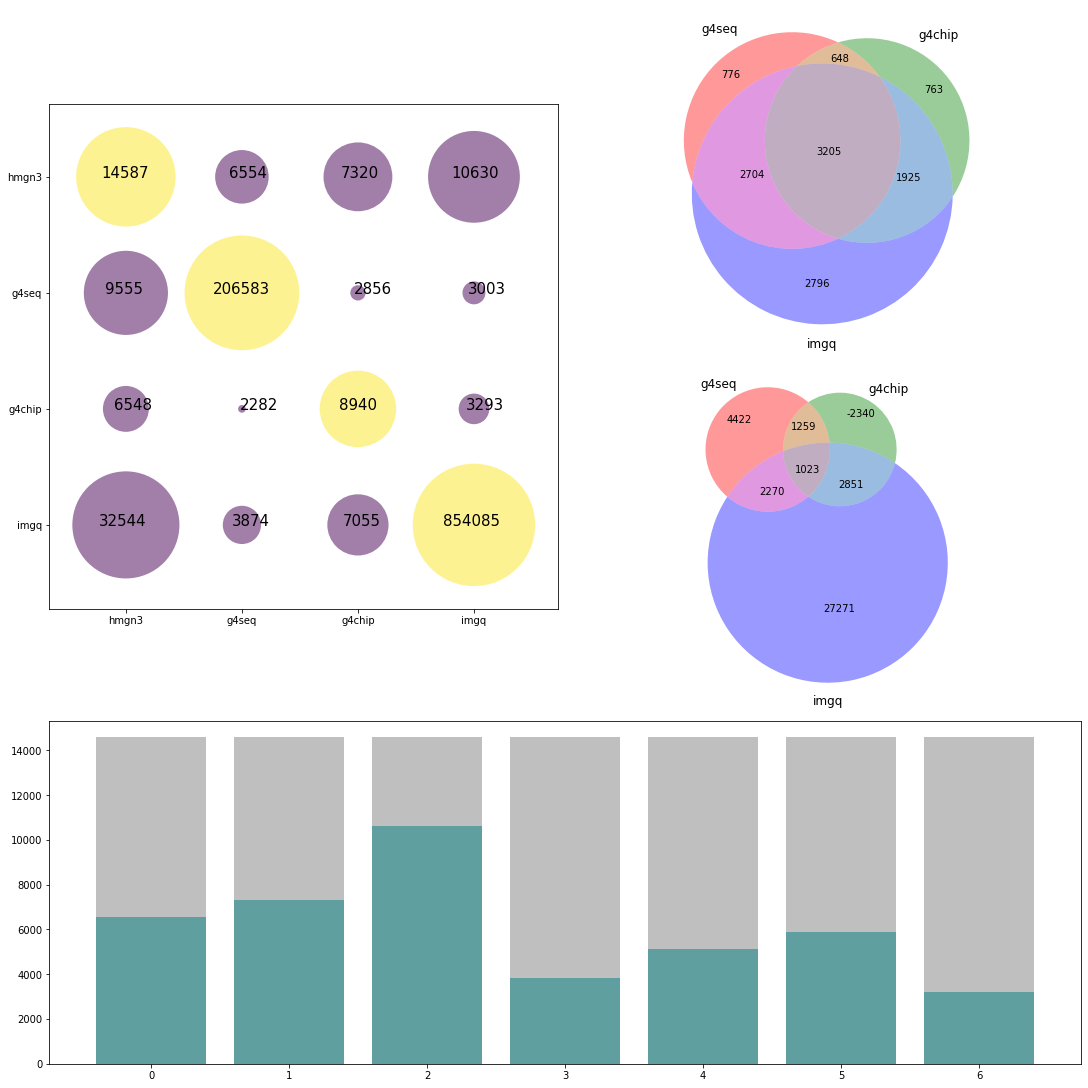

In [40]:
hmgn3 = pybedtools.example_bedtool(home_path+'data/hmgn3.bed')
g4seq = pybedtools.example_bedtool(home_path+'data/g4seq.bed')
g4chip = pybedtools.example_bedtool(home_path+'data/g4chipseq.bed')
imgq = pybedtools.example_bedtool(home_path+'data/imgq3.bed')

fig = generate_plots(hmgn3, g4seq, g4chip, imgq)

In [47]:
# check
for score, delta in product(scores, deltas):
#     if not os.path.exists('data/intersections plots/%d_%d.pickle'%(score, delta)):
#         os.remove('data/intersections/%d_%d.pickle'%(score, delta))
        print(score, delta)
        with open('data/intersections plots/%d_%d.pickle'%(score, delta), 'rb') as f:
                dat = pickle.load(f)
        if not os.path.exists('data/intersections/%d_%d.pickle'%(score, delta)):
            print('too')
        else:
            with open('data/intersections/%d_%d.pickle'%(score, delta), 'rb') as f:
                dat = pickle.load(f)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


In [78]:
def generate_plots_interactive(score, delta):
    global main_data
#     with open('data/intersections plots/%d_%d.pickle'%(score, delta), 'rb') as f:
#          plot1, plot2, plot3, plot4 = pickle.load(f)
#     print('data', main_data)
#     print(score, delta, main_data[(score, delta)])
    plot1, plot2, plot3, plot4 = main_data[(score, delta)]
    fig = plt.figure(constrained_layout=True, figsize=(10, 10), facecolor='white')
    gs = fig.add_gridspec(3, 2)
    
    f3_ax1 = fig.add_subplot(gs[:2, 0], aspect='equal')
    for element in plot1:
#         print(element)
        eval(element)
    
    f3_ax2 = fig.add_subplot(gs[:2, 1])
    for element in plot2:
#         print(element)
        eval(element)
        
#     f3_ax3 = fig.add_subplot(gs[1, 1])
#     for element in plot3:
# #         print(element)
#         eval(element)
        
    f3_ax4 = fig.add_subplot(gs[-1, :])
    for element in plot4:
#         print(element)
        eval(element)
    
    plt.suptitle('Score: %d, delta: %d'%(score, delta))

#### For one / several

In [ ]:
hmgn3 = pybedtools.BedTool(home_path+'data/hmgn3.bed')
g4seq = pybedtools.BedTool(home_path+'data/g4seq.bed')
g4chip = pybedtools.BedTool(home_path+'data/g4chipseq.bed')
imgq = pybedtools.BedTool(home_path+'data/imgq3.bed')

In [128]:
for score in tq([200]):
    for delta in tq(range(34, 50)):
        pregenerate_plots_clean((score, delta))

computing
Plotting
computing
Plotting
computing
Plotting
computing
Plotting
computing
Plotting
computing
Plotting
computing
Plotting
computing


KeyboardInterrupt: 

In [124]:
pregenerate_plots_clean((0, 0, True))

computing
Plotting


In [152]:
main_data = dict({(score, delta):load_plot_data(score, delta) for score, delta in
                  product([200], list(range(34, 40)))})
interact(generate_plots_interactive, 
         score = widgets.ToggleButtons(options=[200]), 
         delta = widgets.IntSlider(min=34, max=40, step=1, value=34));

interactive(children=(ToggleButtons(description='score', options=(200,), value=200), IntSlider(value=34, descr…

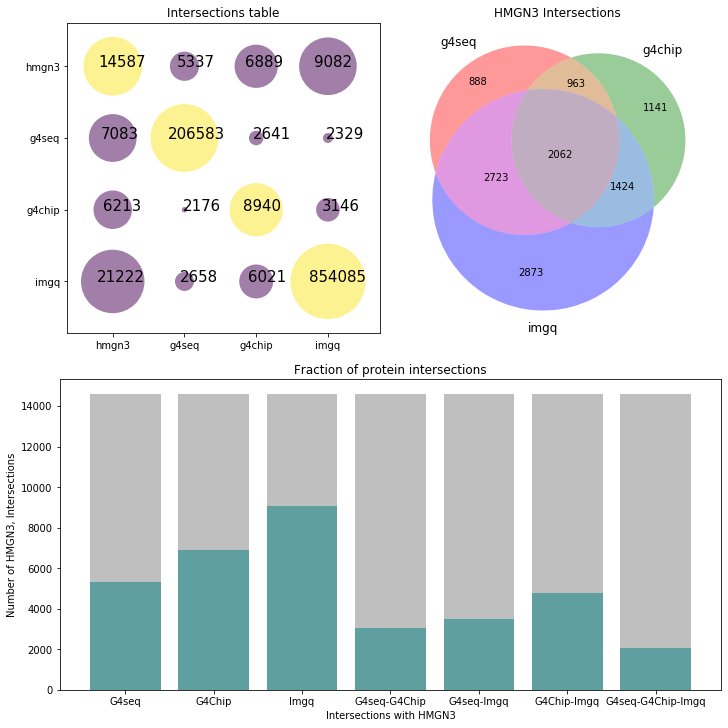

In [125]:
main_data = dict({(score, delta):load_plot_data(score, delta) for score, delta in
                  product([200], load_plot_data(range(34, 50)))})
generate_plots_interactive(0, 0)

In [56]:
plot1, plot2, plot3, plot4 = main_data[(0, 0)]

#### All

In [131]:
def load_plot_data(score, delta):
    with open('data/intersections plots/%d_%d.pickle'%(score, delta), 'rb') as f:
         return pickle.load(f)

In [153]:
scores = [0, 300, 400, 600]
deltas = list(range(0, 301))
pool = Pool(processes=30)
res = pool.map(pregenerate_plots, product(scores, deltas, [True]))

Process ForkPoolWorker-429:
Process ForkPoolWorker-431:
Process ForkPoolWorker-426:
Process ForkPoolWorker-449:
Process ForkPoolWorker-433:
Process ForkPoolWorker-422:
Process ForkPoolWorker-435:
Process ForkPoolWorker-421:
Process ForkPoolWorker-444:
Process ForkPoolWorker-442:
Process ForkPoolWorker-425:
Process ForkPoolWorker-448:
Process ForkPoolWorker-436:
Process ForkPoolWorker-432:
Process ForkPoolWorker-450:
Process ForkPoolWorker-423:
Process ForkPoolWorker-446:
Process ForkPoolWorker-441:
Process ForkPoolWorker-427:
Process ForkPoolWorker-440:
Process ForkPoolWorker-443:
Process ForkPoolWorker-434:
Process ForkPoolWorker-439:
Process ForkPoolWorker-424:
Process ForkPoolWorker-447:
Process ForkPoolWorker-430:
Process ForkPoolWorker-438:
Process ForkPoolWorker-428:
Process ForkPoolWorker-437:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "<ipyt

KeyboardInterrupt: 

  File "/data5/bio/runs-tikhonova/anaconda3/envs/main/lib/python3.7/site-packages/pybedtools/bedtool.py", line 840, in decorated
    result = method(self, *args, **kwargs)
  File "<ipython-input-11-98fd75d77140>", line 29, in compute_intersections
    ds_dict_hmgn, intersect_table_hmgn = generate_intersect_table(hmgn3, g4seq, g4chip, imgq, colnames, mode='hmgn')
  File "<ipython-input-8-97124b4a84d7>", line 31, in generate_intersect_table
    intersect_table[i, j] = len(ds_dict[A].intersect(ds_dict[B], u=mode_flag))
  File "<ipython-input-11-98fd75d77140>", line 29, in compute_intersections
    ds_dict_hmgn, intersect_table_hmgn = generate_intersect_table(hmgn3, g4seq, g4chip, imgq, colnames, mode='hmgn')
  File "/data5/bio/runs-tikhonova/anaconda3/envs/main/lib/python3.7/site-packages/pybedtools/bedtool.py", line 1142, in __len__
    return self.count()
  File "/data5/bio/runs-tikhonova/anaconda3/envs/main/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*se

In [92]:
scores = [0, 300, 400, 600]
deltas = list(range(0, 301))
main_data = dict({(score, delta):load_plot_data(score, delta) for score, delta in product(scores, deltas)})

FileNotFoundError: [Errno 2] No such file or directory: 'data/intersections plots/0_0.pickle'

In [79]:
interact(generate_plots_interactive, 
         score = widgets.ToggleButtons(options=[0, 300, 400, 600]), 
         delta = widgets.IntSlider(min=0, max=300, step=1, value=34));

interactive(children=(ToggleButtons(description='score', options=(0, 300, 400, 600), value=0), IntSlider(value…

### Drafts

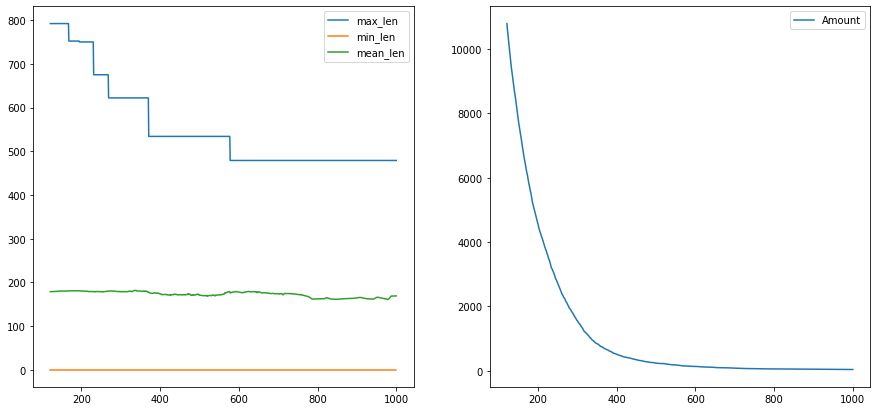

In [97]:
fig = plt.figure(figsize=(15, 7), facecolor='white')
fig.add_subplot(121)
plt.plot(scores_data['score'], scores_data['max_len'], label='max_len')
plt.plot(scores_data['score'], scores_data['min_len'], label='min_len')
plt.plot(scores_data['score'], scores_data['mean_len'], label='mean_len');
plt.legend()
fig.add_subplot(122)
plt.plot(scores_data['score'], scores_data['amount'], label='Amount');
plt.legend();